<a href="https://colab.research.google.com/github/charookc5/AIML_internship/blob/main/AIML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv('Housing.csv')  # Replace with the correct file name
print(df.head())
print(df.info())
print(df.describe())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

Preprocess the Data
Handle categorical variables

Normalize if needed

Handle missing values

In [3]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Check for missing values
print(df.isnull().sum())


price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


 Split Dataset into Features and Target

In [4]:
X = df.drop('price', axis=1)   # Independent variables
y = df['price']                # Dependent variable


Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Fit Linear Regression Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Model Evaluation

In [7]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.2f}')


MAE: 970043.40
MSE: 1754318687330.66
R² Score: 0.65


 Visualize Regression Line (for Simple Regression)

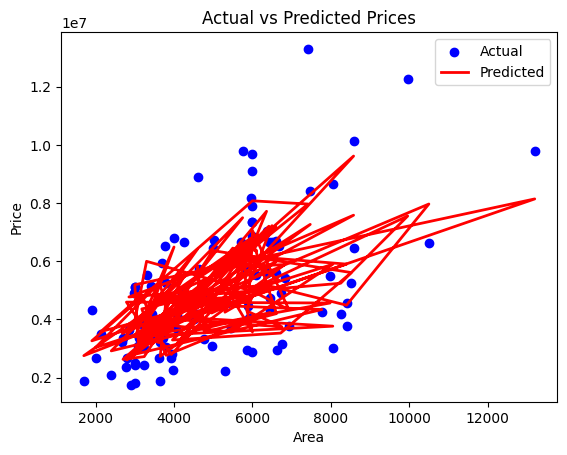

In [8]:
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.plot(X_test['area'], y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()


Interpret Coefficients

In [9]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05
